In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('data/tourism_resource_dataset.csv')
df.head()

,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)

df_cleaned = df.dropna()

missing_data_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing data after cleaning:\n", missing_data_after_cleaning)

Missing data in each column:
 timestamp               0
location_id             0
visitor_count           0
resource_usage_rate     0
temperature             0
air_quality_index       0
noise_level             0
season                  0
peak_hour_flag          0
visitor_satisfaction    0
sensor_noise_flag       0
resource_prediction     0
resource_allocation     0
t_sne_dim1              0
t_sne_dim2              0
dtype: int64

Missing data after cleaning:
 timestamp               0
location_id             0
visitor_count           0
resource_usage_rate     0
temperature             0
air_quality_index       0
noise_level             0
season                  0
peak_hour_flag          0
visitor_satisfaction    0
sensor_noise_flag       0
resource_prediction     0
resource_allocation     0
t_sne_dim1              0
t_sne_dim2              0
dtype: int64


In [4]:
env_factors = df_cleaned[['temperature', 'air_quality_index', 'noise_level']]
summary_stats = env_factors.describe()
print("Summary statistics for environmental factors:\n", summary_stats)


Summary statistics for environmental factors:
        temperature  air_quality_index  noise_level
count  1000.000000        1000.000000  1000.000000
mean     25.181186          86.485000    64.028052
std       5.758527          37.615166    19.916098
min      15.008856          20.000000    30.013057
25%      20.231001          53.000000    46.979884
50%      25.449839          87.000000    63.456537
75%      30.240147         120.000000    81.232047
max      34.994276         149.000000    99.826269


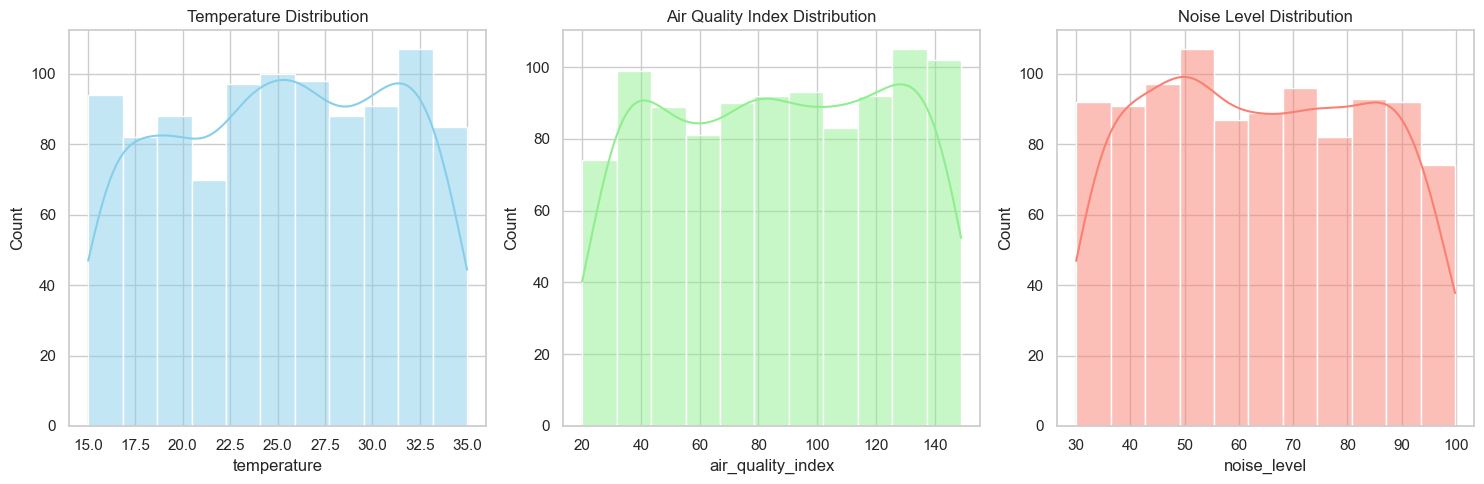

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['temperature'], kde=True, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['air_quality_index'], kde=True, color='lightgreen')
plt.title('Air Quality Index Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['noise_level'], kde=True, color='salmon')
plt.title('Noise Level Distribution')

plt.tight_layout()
plt.show()


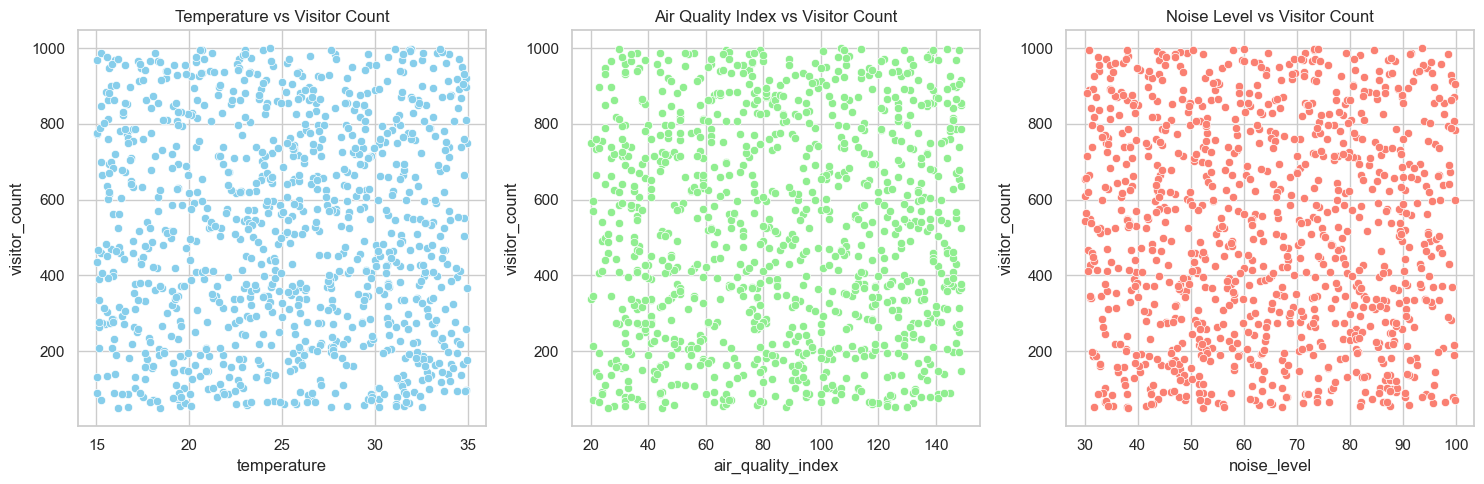

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df_cleaned['temperature'], y=df_cleaned['visitor_count'], color='skyblue')
plt.title('Temperature vs Visitor Count')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_cleaned['air_quality_index'], y=df_cleaned['visitor_count'], color='lightgreen')
plt.title('Air Quality Index vs Visitor Count')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cleaned['noise_level'], y=df_cleaned['visitor_count'], color='salmon')
plt.title('Noise Level vs Visitor Count')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\3032990242.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_avg = df_cleaned.groupby('temperature_range')['visitor_count'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\3032990242.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_quality_avg = df_cleaned.groupby('air_quality_range')['visitor_count'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\3032990242.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

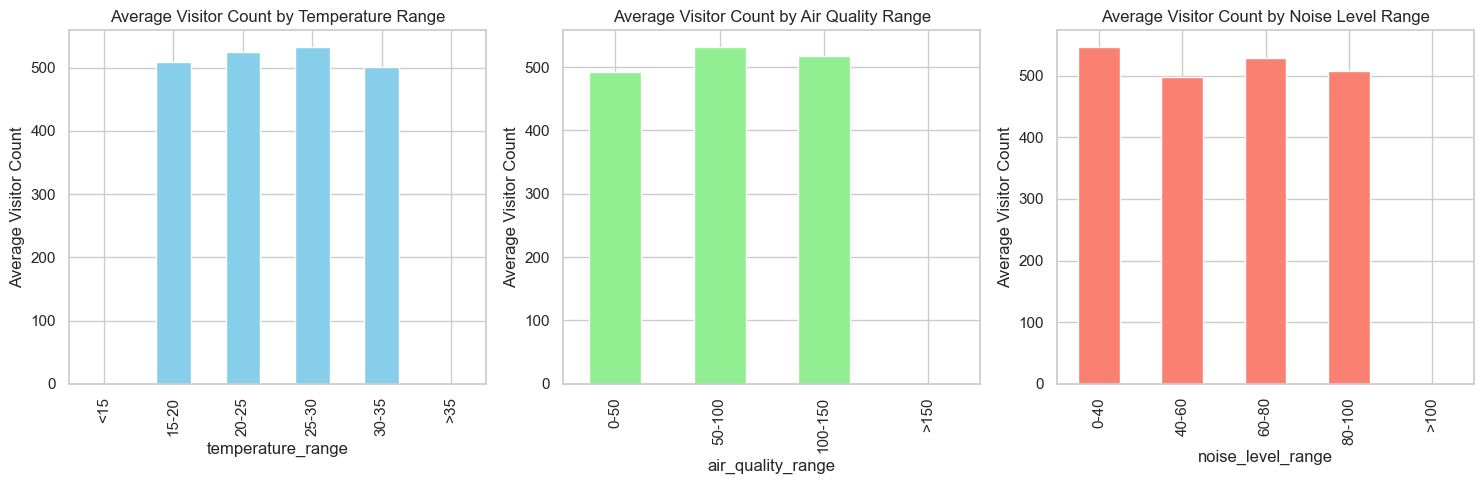

In [7]:
temperature_bins = [0, 15, 20, 25, 30, 35, np.inf]
temperature_labels = ['<15', '15-20', '20-25', '25-30', '30-35', '>35']
df_cleaned['temperature_range'] = pd.cut(df_cleaned['temperature'], bins=temperature_bins, labels=temperature_labels)

air_quality_bins = [0, 50, 100, 150, np.inf]
air_quality_labels = ['0-50', '50-100', '100-150', '>150']
df_cleaned['air_quality_range'] = pd.cut(df_cleaned['air_quality_index'], bins=air_quality_bins, labels=air_quality_labels)

noise_level_bins = [0, 40, 60, 80, 100, np.inf]
noise_level_labels = ['0-40', '40-60', '60-80', '80-100', '>100']
df_cleaned['noise_level_range'] = pd.cut(df_cleaned['noise_level'], bins=noise_level_bins, labels=noise_level_labels)

temperature_avg = df_cleaned.groupby('temperature_range')['visitor_count'].mean()
air_quality_avg = df_cleaned.groupby('air_quality_range')['visitor_count'].mean()
noise_level_avg = df_cleaned.groupby('noise_level_range')['visitor_count'].mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
temperature_avg.plot(kind='bar', color='skyblue')
plt.title('Average Visitor Count by Temperature Range')
plt.ylabel('Average Visitor Count')

plt.subplot(1, 3, 2)
air_quality_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Visitor Count by Air Quality Range')
plt.ylabel('Average Visitor Count')

plt.subplot(1, 3, 3)
noise_level_avg.plot(kind='bar', color='salmon')
plt.title('Average Visitor Count by Noise Level Range')
plt.ylabel('Average Visitor Count')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\2695721117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_satisfaction = df_cleaned.groupby('temperature_range')['visitor_satisfaction'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\2695721117.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_quality_satisfaction = df_cleaned.groupby('air_quality_range')['visitor_satisfaction'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1892\2695721117.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

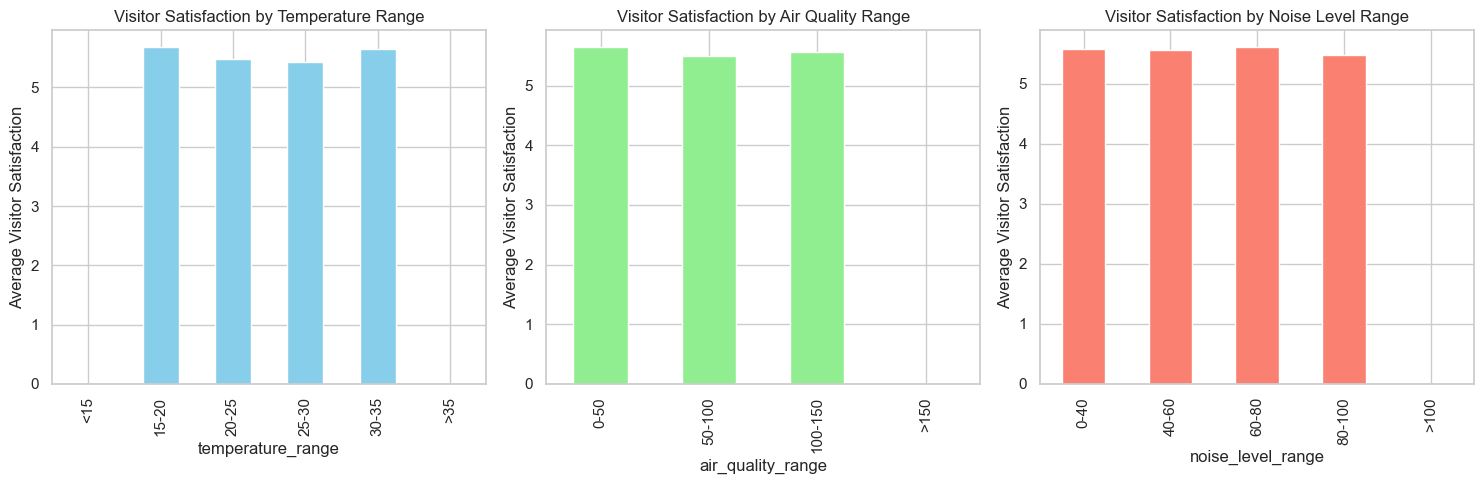

In [8]:
temperature_satisfaction = df_cleaned.groupby('temperature_range')['visitor_satisfaction'].mean()

air_quality_satisfaction = df_cleaned.groupby('air_quality_range')['visitor_satisfaction'].mean()

noise_level_satisfaction = df_cleaned.groupby('noise_level_range')['visitor_satisfaction'].mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
temperature_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Visitor Satisfaction by Temperature Range')
plt.ylabel('Average Visitor Satisfaction')


plt.subplot(1, 3, 2)
air_quality_satisfaction.plot(kind='bar', color='lightgreen')
plt.title('Visitor Satisfaction by Air Quality Range')
plt.ylabel('Average Visitor Satisfaction')

plt.subplot(1, 3, 3)
noise_level_satisfaction.plot(kind='bar', color='salmon')
plt.title('Visitor Satisfaction by Noise Level Range')
plt.ylabel('Average Visitor Satisfaction')

plt.tight_layout()
plt.show()


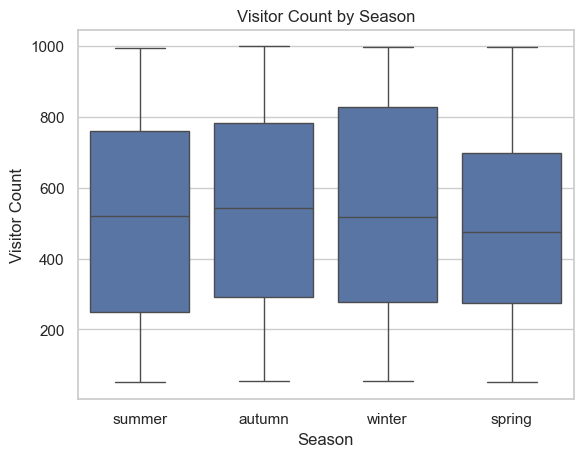

In [9]:
sns.boxplot(x='season', y='visitor_count', data=df)
plt.title('Visitor Count by Season')
plt.xlabel('Season')
plt.ylabel('Visitor Count')
plt.show()

In [10]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['location_id', 'season', 'resource_allocation'], drop_first=True)

df_cleaned['resource_prediction'] = pd.to_numeric(df_cleaned['resource_prediction'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['resource_prediction'])

X = df_cleaned[['visitor_count', 'temperature', 'air_quality_index', 'noise_level', 'visitor_satisfaction', 'peak_hour_flag', 'sensor_noise_flag']]
y = df_cleaned['resource_prediction']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 800
Test set size: 200


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.01038020466937013
R-squared (R2): 0.6325857944469592


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")


Random Forest MSE: 0.011721833547464405
Random Forest R2: 0.5850979534945961


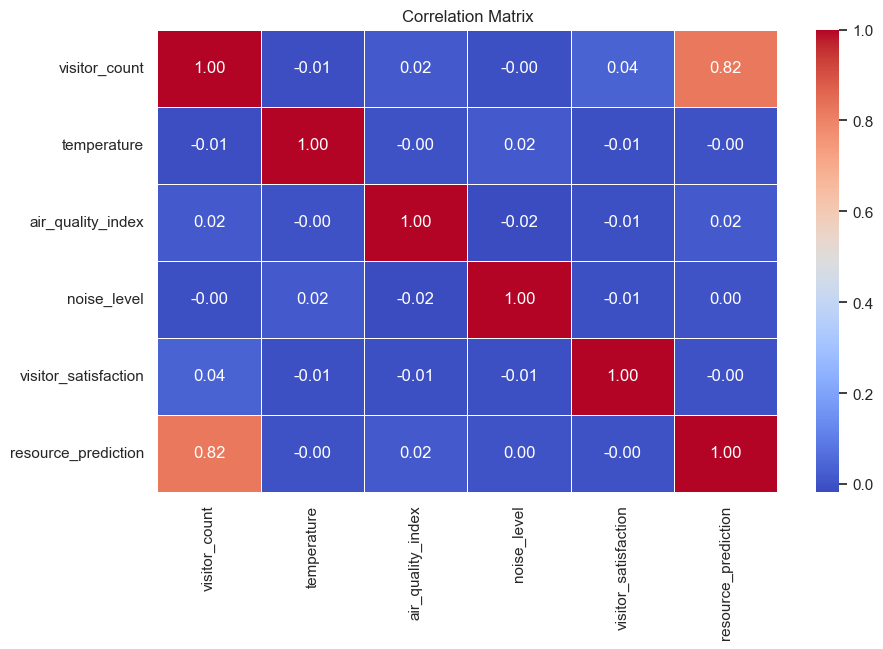

In [14]:
correlation_matrix = df_cleaned[['visitor_count', 'temperature', 'air_quality_index', 'noise_level', 'visitor_satisfaction', 'resource_prediction']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()